<a href="https://colab.research.google.com/github/anushabhuchupalli/LLINTERN/blob/main/Ceditcard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [10]:
df = df.dropna()
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

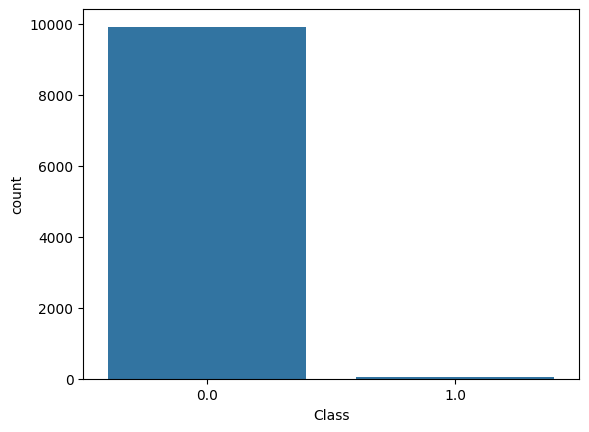

In [24]:
sns.countplot(x=df['Class'])


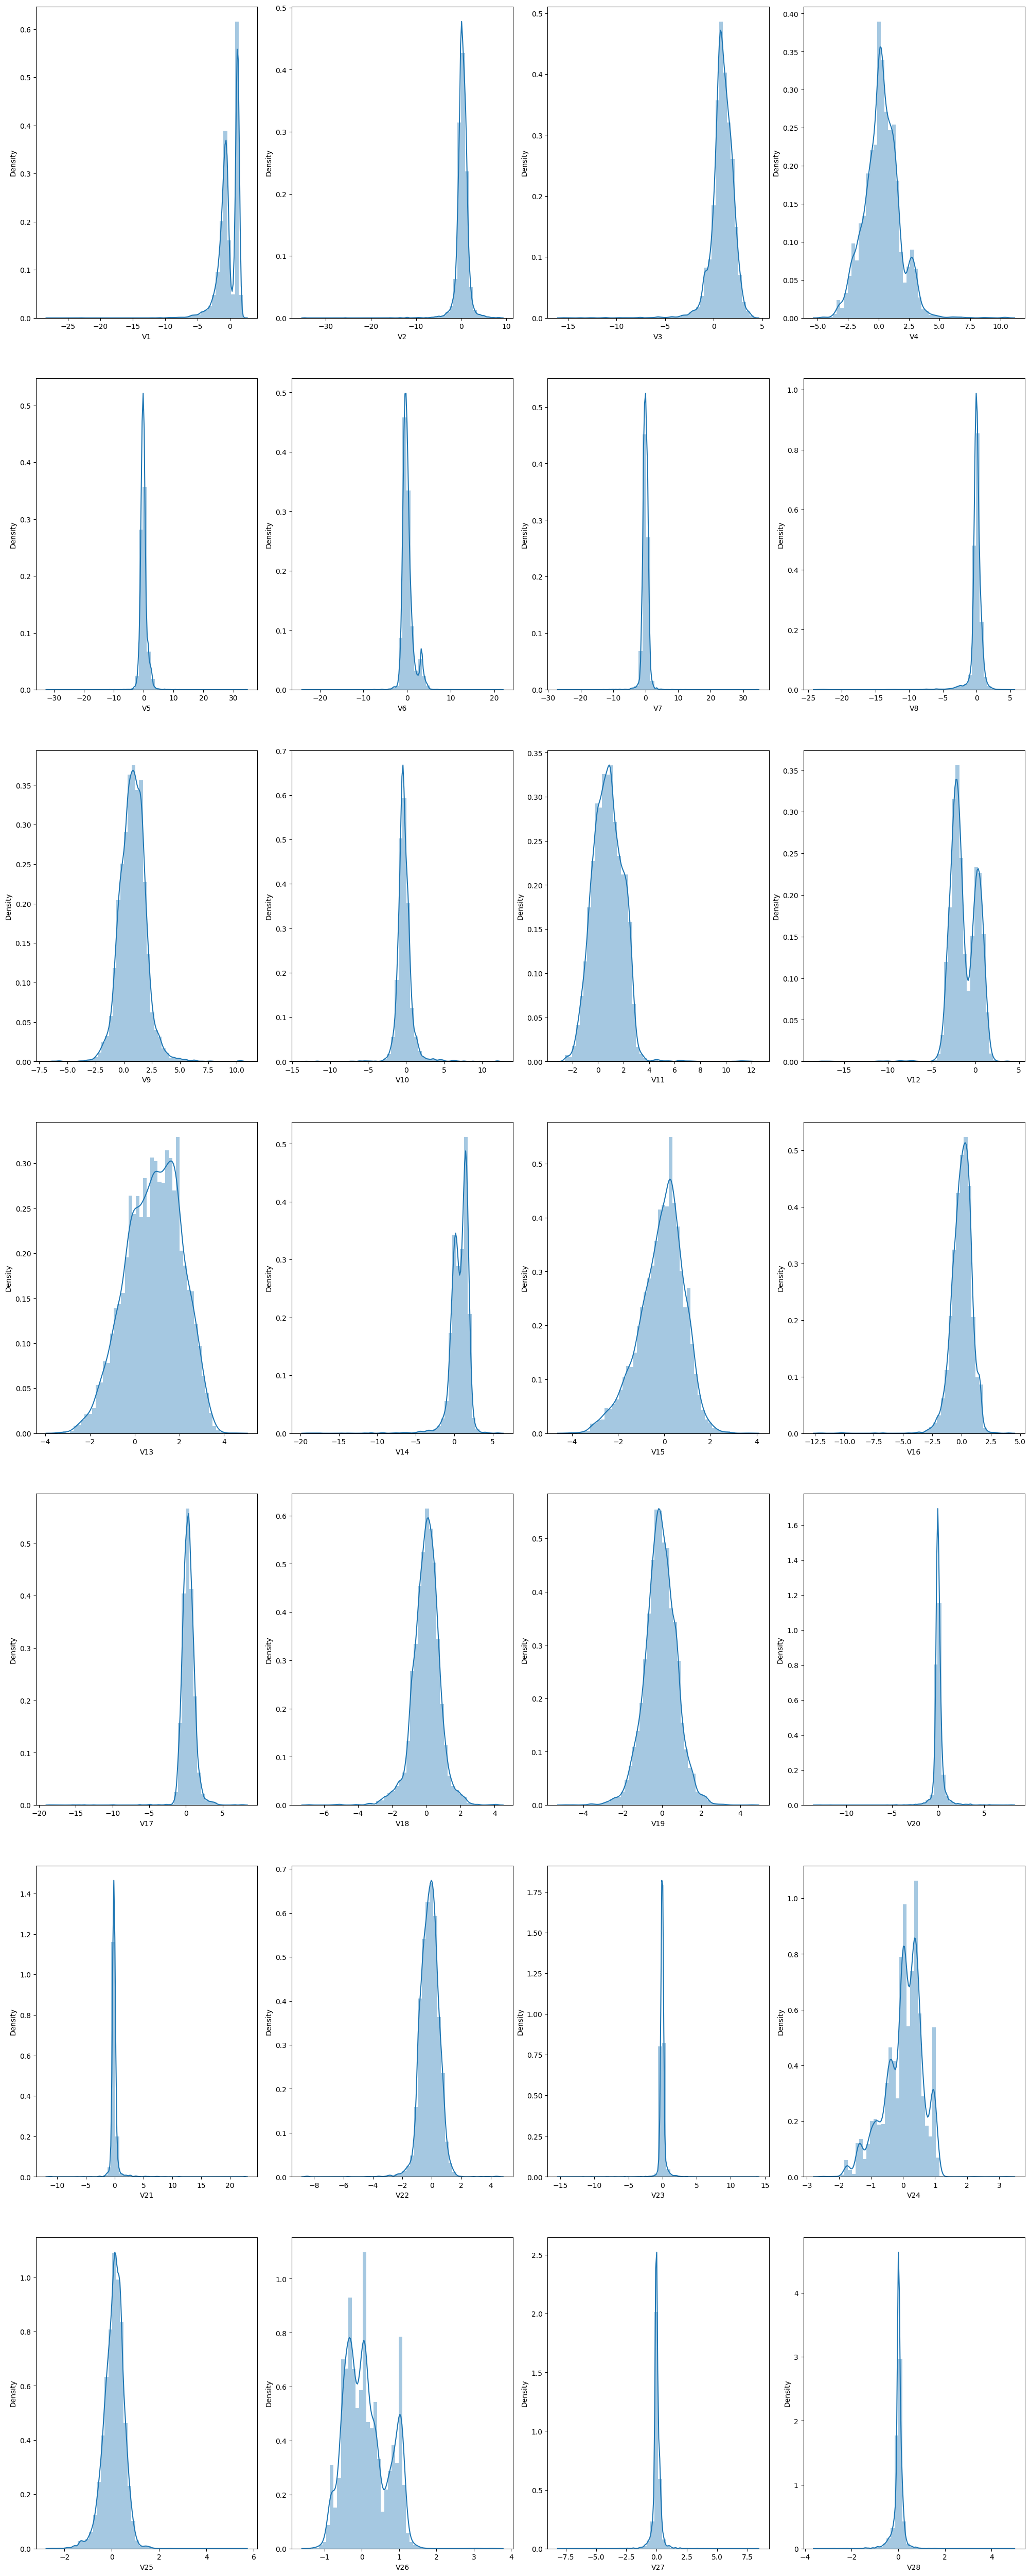

In [25]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Density'>

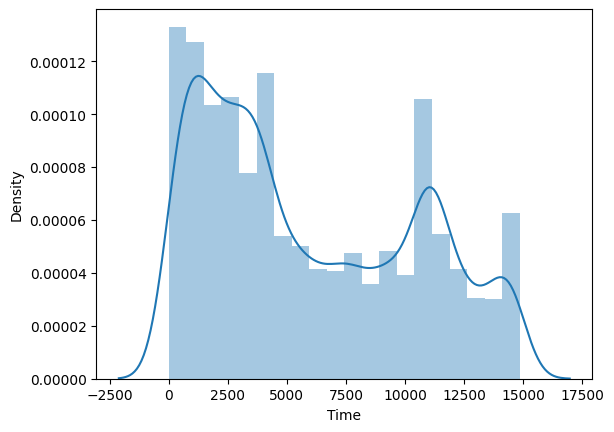

In [13]:
sns.distplot(df['Time'])


<Axes: xlabel='Amount', ylabel='Density'>

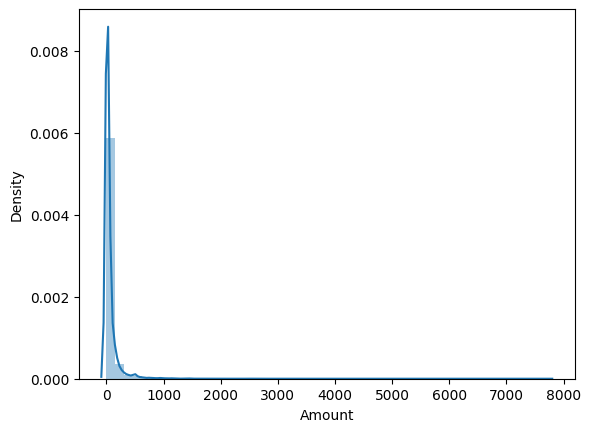

In [14]:
sns.distplot(df['Amount'])


<Axes: >

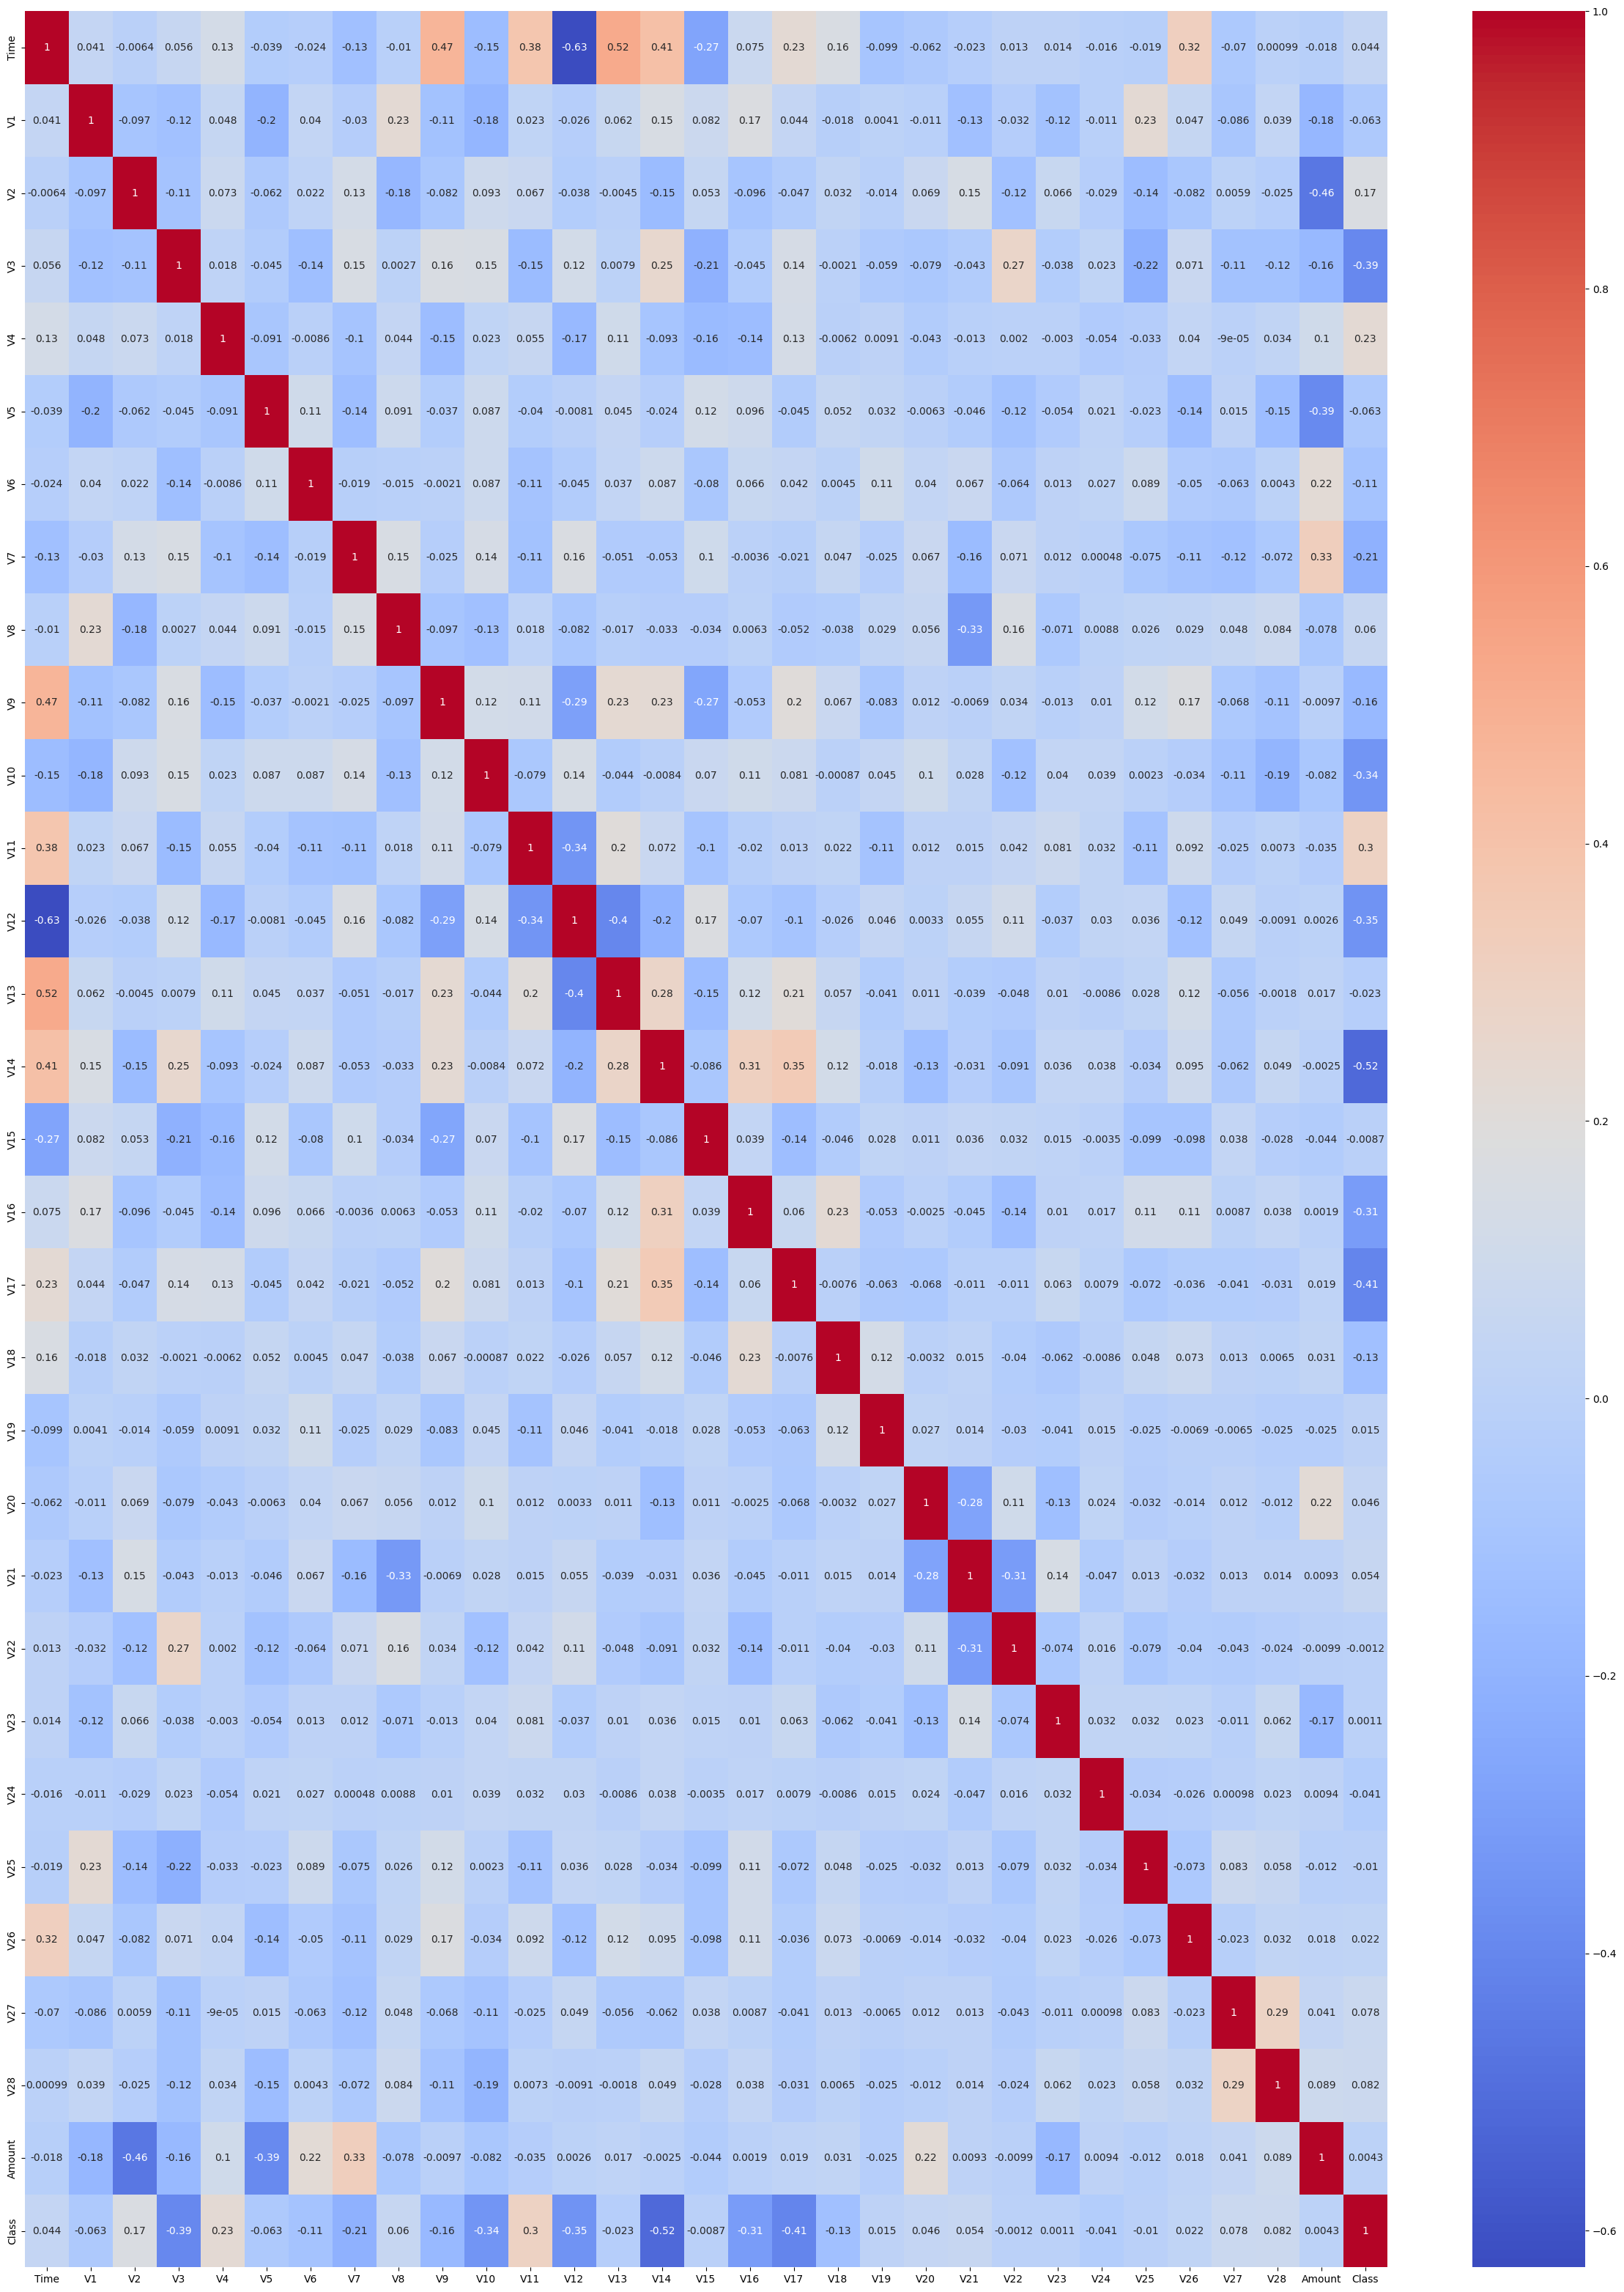

In [15]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [26]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [28]:
x_scaler[-1]


array([ 2.00683284,  1.01557227, -0.25468169, -0.42452105, -0.23741007,
       -0.14970181, -0.02644933, -0.45405982,  0.10518812,  0.70564383,
       -0.10968196,  0.39610754, -0.75458533,  0.19098022,  0.89555767,
        0.14629381,  1.238491  , -0.65286243,  1.05984139,  0.69608493,
       -0.2312358 , -0.35804283, -1.23101443,  0.11139656, -1.51340779,
       -0.00681785,  1.24261703, -0.2563498 , -0.06924471, -0.31550843])

In [29]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       1.00      0.89      0.94         9

    accuracy                           1.00      2491
   macro avg       1.00      0.94      0.97      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.9411764705882353


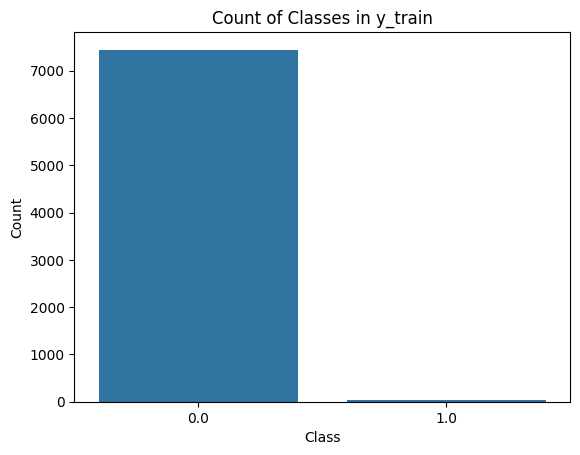

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
sns.countplot(x=y_train)

# Customize the plot
plt.title('Count of Classes in y_train')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       0.89      0.89      0.89         9

    accuracy                           1.00      2491
   macro avg       0.94      0.94      0.94      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.8888888888888888
